Initially load Data from a .wav file using the wave library, this library is used to get data from the .WAV file header as well as perform functions on the data. the .open() funcion loads the file into the variable f. The bytestring of sound pressure readings is then stored in frames using the .readframes() method

In [1]:
import wave

FNAME = './heartbeat-sounds/set_a/murmur__201101051104.wav'

f = wave.open(FNAME)
frames = f.readframes(-1)

The values in the bytestring for each reading are split over a number of bits, to find out how many bits are used in this file the sample width is read from the file header (now in f) and in this case is 2 bytes or 16 bits per data point

In [2]:
#print(f.getsampwidth())
print(f.getframerate())

44100


The bytestring (in frames) can then be converted to an array of integers with the struct function using the Format 'h' to represent a 2-byte integer in python 
(A slight trick in the struct library is that it wants its format string to exactly match the expected size, so we have to multiply the format character 'h' by the number of frames in the bytestring)

In [8]:
import struct
samples = struct.unpack('h'*f.getnframes(), frames)
print(samples[:10])

(-241, -230, -226, -223, -208, -205, -197, -185, -183, -177)


To calculate the time interval for each sample the .getframerate() method is used to get the value from the header. An array is created the same length as the sample array with the time at each sample calculated and stored

In [12]:
framerate = f.getframerate()
t = [float(i)/framerate for i in range(len(samples))]
print(t[:10])

[0.0, 2.2675736961451248e-05, 4.5351473922902495e-05, 6.802721088435374e-05, 9.070294784580499e-05, 0.00011337868480725624, 0.00013605442176870748, 0.00015873015873015873, 0.00018140589569160998, 0.00020408163265306123]


Now I can plot the sample vales with respect to time using the pylab library

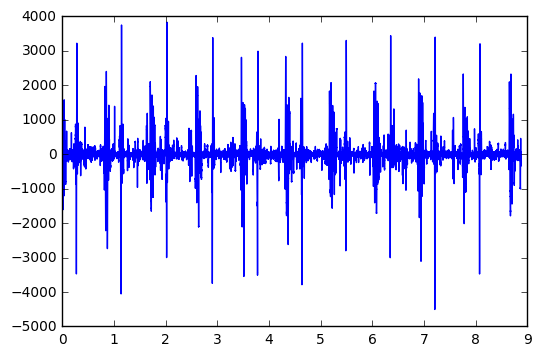

In [13]:
from pylab import *
plot(t, samples)
plt.show()

Now to try converting the data to a spectrogram
First Import required libraries

In [14]:
from scipy import signal
import matplotlib.pyplot as plt
import pylab

In [15]:
sound_info = pylab.fromstring(frames, 'Int16')
frame_rate = framerate

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


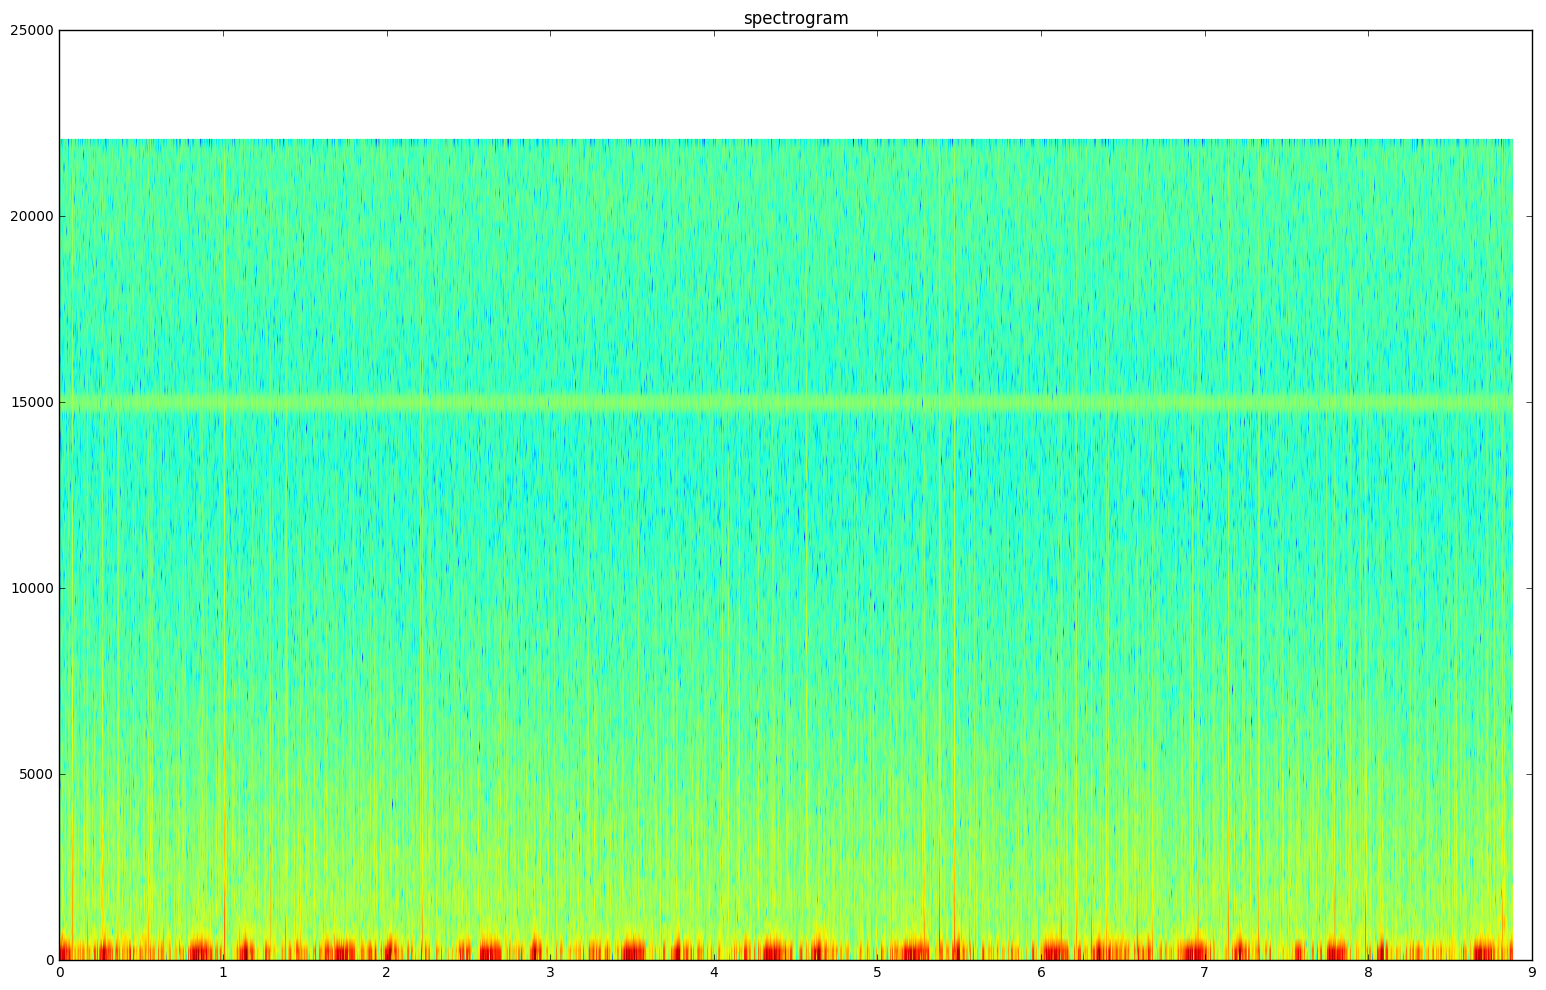

In [16]:
pylab.figure(num=None, figsize=(19, 12))
pylab.subplot(111)
pylab.title('spectrogram')
pylab.specgram(sound_info, Fs=frame_rate)
pylab.savefig('spectrogram.png')
pylab.show()